In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns


## Variables in dataset

- age - float - 40 to 95
- anaemia - int - 0/1 with threshold Hct 36% - converts to 120 g/L 
- creatinine_phosphokinase (CK) - int
- diabetes - int - 0/1 
- ejection_fraction - int
- high_blood_pressure - int - 0/1, not defined 
- platelets - float
- serum_creatinine (Cr) - float - unit is mg/dL instead of usual micromol/L 
- serum_sodium (Na) - int
- sex - int - 0/1 with 1 male, 0 female
- smoking - int - 0/1 
- time - int - time for follow-up in days
- death_event - 1 for dead, 0 for alive 

In [22]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## check it's reading as a df
type(data)

pandas.core.frame.DataFrame

In [16]:
## check layout
data.head()

age_group
40-50    47
50-60    82
60-70    93
70-80    52
80-90    19
Name: count, dtype: int64

In [6]:
## check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
## check values and counts
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
## check for any missing values 
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA

## Age and Sex

In [28]:
## make a function to add the count above a bar in a barplot
def annotate_bars(ax):
    ## annotate height of each bar in a bar plot 
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )

In [ ]:
## let's look at survival as it relates to sex

custom_palette = ['skyblue', 'pink']
sns.set_palette(custom_palette)

ax = sns.countplot(x='DEATH_EVENT', hue='Sex', data=train_data)

plt.title('Male/Female Passengers and whether they Survived')
plt.xlabel('Survival - 0 no, 1 yes')
plt.ylabel('Number of people')

In [24]:
## define age bins and labels 
age_bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

## make new column with age_bins
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=labels, right=False)

## count people in each age group
age_count = data['age_group'].value_counts().sort_index()

age_count

age_group
40-50     47
50-60     82
60-70     93
70-80     52
80-90     19
90-100     6
Name: count, dtype: int64

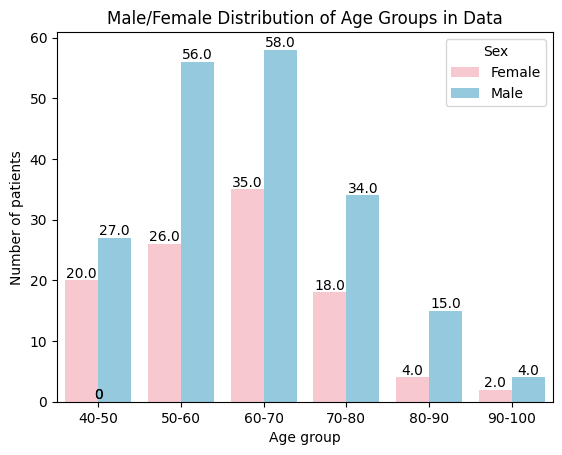

In [36]:
## Set the palette with custom colors
custom_palette = ['pink', 'skyblue']
sns.set_palette(custom_palette)

## create a countplot according to gender and age group
ax1 = sns.countplot(x='age_group', hue='sex', data=data)

plt.title('Male/Female Distribution of Age Groups in Data')
plt.xlabel('Age group')
plt.ylabel('Number of patients')

## add count above bars
annotate_bars(ax1)

## change legend labels
legend_labels = ['Female', 'Male']
ax1.legend(legend_labels, title='Sex')

plt.show()